<a href="https://www.kaggle.com/code/ishratjahantonny/data-analysis-newyork-restaurant-foods?scriptVersionId=140065321" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

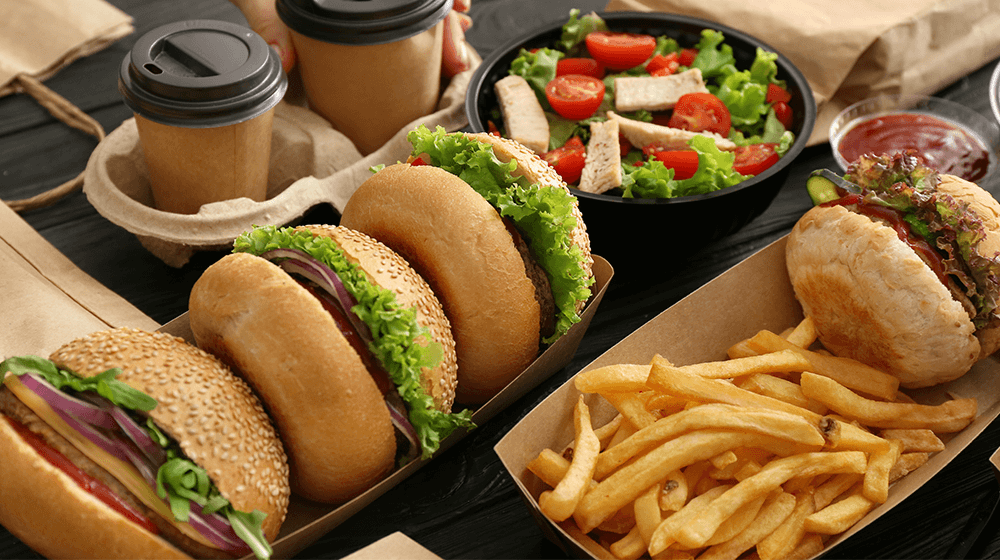
<div  class="alert alert-success" style="background-color:  #2193b0
; border-color: #694b98; font-size: 23pt;font-family: Serif; color: white"> 
        <b> <center> Overview </center> </b>
    <a name="Overview"></a>
</div>
<h1><center style="color:#159364; font-family:cursive;">Trip Advisor New York City Restaurants Food Dataset🍕🍗🍔</center></h1>

The Trip Advisor New York City Restaurants dataset is a comprehensive collection of information about various restaurants in New York City. It provides valuable insights into the restaurant landscape, customer reviews, popular food items, and online order availability. The dataset is sourced from the Kaggle platform and contains 10,000 records.

The dataset includes several key columns that capture important details about each restaurant. The 'Title' column represents the name of the restaurant, providing a unique identifier for each entry. The 'Number of review' column indicates the number of reviews recorded by the website for each restaurant, which gives an indication of their popularity or level of customer engagement.

The 'Category' column specifies the type of food available at each restaurant, offering insights into the culinary diversity present in New York City. The 'Review Comment' column contains random comments from customers, providing subjective opinions and feedback about their dining experiences.

Additionally, the 'Popular food' column lists specific food items that are popular or frequently mentioned for each restaurant. This information can help identify signature dishes or customer favorites. The 'Online Order' column indicates whether online food delivery is available for each restaurant, with options such as 'Yes', 'No', 'See events', and 'Reserve'.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings



/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<h1><center style="color:#159364; font-family:cursive;">Import the necessary libraries</center></h1>

In [2]:
data = pd.read_csv('/kaggle/input/trip-advisor-newyork-city-restaurants-dataset-10k/trip advisor restaurents  10k - trip_rest_neywork_1.csv')
main_df = pd.DataFrame(data)
df = main_df.copy()

df.head(5)


,Title,Number of review,Catagory,Reveiw Comment,Popular food,Online Order
0,All Stars Sports Bar & Grill,21,"Bar, Pub","“The fries were terrific also, hot crisp...”",fries,Yes
1,Olio e Piu,"2,998","Italian, Pizza",“I love the food and our server Maria!”,filet mignon,Yes
2,Boucherie West Village,"1,465","French, Steakhouse",“The filet mignon was impeccable and the musse...,lobster,Yes
3,Club A Steakhouse,"4,413","American, Steakhouse",“My seafood cocktail had wonderful large lump ...,cacio e pepe,Yes
4,Piccola Cucina Estiatorio,403,"Italian, Sicilian",“penne al pomodoro and bucatini cacio e pepe w...,mussels,Yes


In [3]:
df.describe()

,Title,Number of review,Catagory,Reveiw Comment,Popular food,Online Order
count,10397,10397,10397,10397,10397,10397
unique,7237,857,560,6029,539,4
top,Royal 35 Steakhouse,No,"Italian, Pizza",No,No,No
freq,82,1511,822,2199,7709,5729


In [4]:
df.shape

(10397, 6)

In [5]:
df.columns

Index(['Title', 'Number of review', 'Catagory', 'Reveiw Comment',
       'Popular food', 'Online Order'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10397 entries, 0 to 10396
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Title             10397 non-null  object
 1   Number of review  10397 non-null  object
 2   Catagory          10397 non-null  object
 3   Reveiw Comment    10397 non-null  object
 4   Popular food      10397 non-null  object
 5   Online Order      10397 non-null  object
dtypes: object(6)
memory usage: 487.5+ KB


No null value is available is here

Here is the updated list of columns and their meanings in the Trip Advisor New York City Restaurants dataset:

* **Title:** Name of the Restaurants
* **Number of review:** How many reviews recorded by the website
* **Category:** Type of food available here
* **Review Comment:** A random comment from all the reviews by the customers
* **Popular food:** A popular food of the restaurants
* **Online Order:** Online food delivery available or not

<h1><center style="color:#159364; font-family:cursive;">Data Preprocessing</center></h1>

In [7]:
#Missing values checking
df.isnull().sum()

Title               0
Number of review    0
Catagory            0
Reveiw Comment      0
Popular food        0
Online Order        0
dtype: int64

In [8]:
# Checking the data type
df.dtypes

Title               object
Number of review    object
Catagory            object
Reveiw Comment      object
Popular food        object
Online Order        object
dtype: object

In [9]:
# Convert "Number of review" column to numeric
df['Number of review'] = pd.to_numeric(df['Number of review'], errors='coerce')

In [10]:
# Checking the data type
df.dtypes

Title                object
Number of review    float64
Catagory             object
Reveiw Comment       object
Popular food         object
Online Order         object
dtype: object

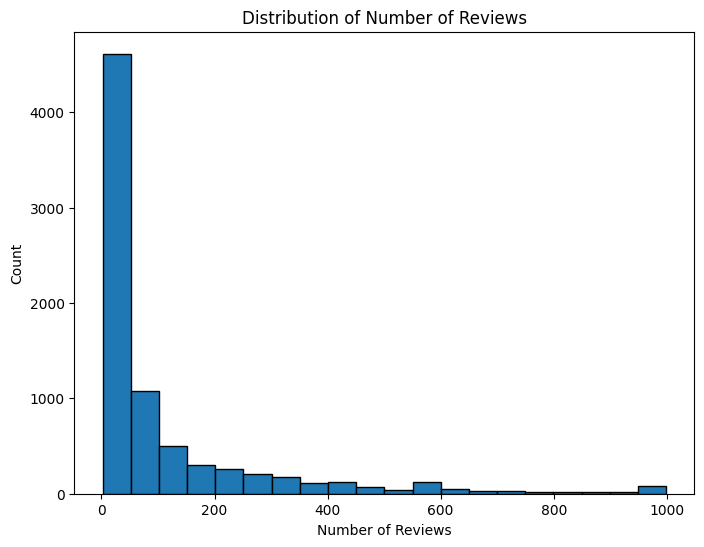

In [11]:
plt.figure(figsize=(8, 6))
plt.hist(df['Number of review'], bins=20, edgecolor='k')
plt.xlabel('Number of Reviews')
plt.ylabel('Count')
plt.title('Distribution of Number of Reviews')
plt.show()

<h1><center style="color:#159364; font-family:cursive;">Popular food Items🍕🍗🍔</center></h1>

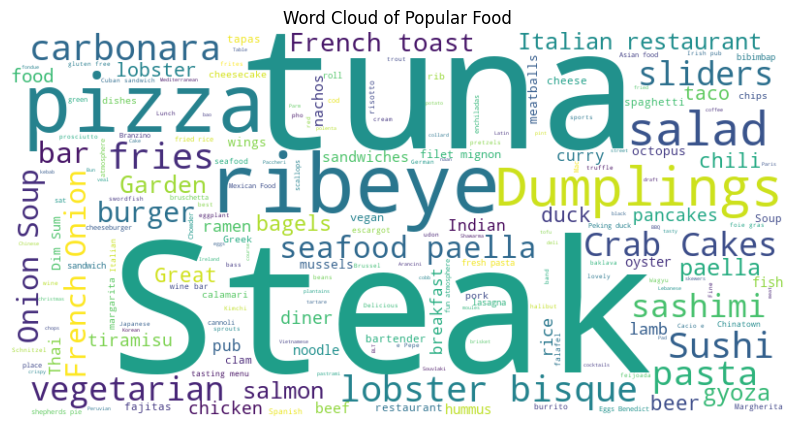

In [12]:
from wordcloud import WordCloud

popular_food_text = ' '.join(df['Popular food'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(popular_food_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Popular Food')
plt.show()

This word cloud visualization represents the popular food items mentioned in the dataset, with larger words indicating higher frequency.

In [13]:
# Get the counts of each food item
popular_food_counts = df['Popular food'].value_counts()
popular_food_counts



No                       7709
tuna                      129
ribeye                    127
Steak                      83
salad                      78
                         ... 
an Italian restaurant       1
Huevos rancheros            1
Great Mexican Food          1
Yorkshire pudding           1
soup dumplings              1
Name: Popular food, Length: 539, dtype: int64

In [14]:
# Select the top 10 popular food items
top_10_popular_food = popular_food_counts.head(10)

# Display the top 10 popular food items
print("Top 10 Popular Food Items:")
print(top_10_popular_food)

Top 10 Popular Food Items:
No                7709
tuna               129
ribeye             127
Steak               83
salad               78
steak               74
lobster bisque      68
carbonara           65
fries               62
Dumplings           57
Name: Popular food, dtype: int64


In [15]:
# Sort the DataFrame by 'Rating' column in descending order
sorted_df = df.sort_values(by='Number of review', ascending=False)

# Get the highest rated restaurant(s)
highest_rated_restaurants = sorted_df[sorted_df['Number of review'] == sorted_df['Number of review'].max()]

# Display the highest rated restaurant(s)
print(highest_rated_restaurants[['Title', 'Number of review']])

                           Title  Number of review
1173  Smith's Bar and Restaurant             999.0


According to the provided dataset excerpt, the restaurant with the highest rating is **"Smith's Bar and Restaurant"** with a total of 999 reviews.

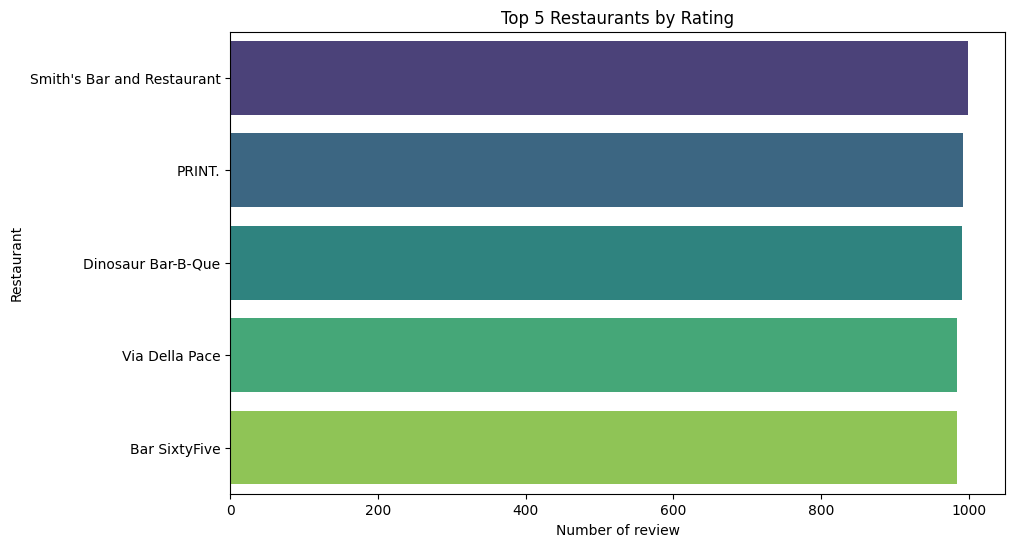

In [16]:
# Get the top N restaurants based on ratings
N = 5  # Number of top restaurants to display
top_restaurants = df.nlargest(N, 'Number of review')

# Create a bar plot for the top restaurants
plt.figure(figsize=(10, 6))
sns.barplot(data=top_restaurants, x='Number of review', y='Title', palette='viridis')
plt.xlabel('Number of review')
plt.ylabel('Restaurant')
plt.title(f'Top {N} Restaurants by Rating')
plt.show()

In [17]:
top_restaurants

,Title,Number of review,Catagory,Reveiw Comment,Popular food,Online Order
1173,Smith's Bar and Restaurant,999.0,"American, Bar","“Had the truffle fries, caesar salad, br...”",No,No
193,PRINT.,992.0,American,“Very Good Farm to Table Cooking”,Farm to Table,Yes
64,Dinosaur Bar-B-Que,991.0,"American, Bar","“Lunch in Chelsea, NYC”",No,No
94,Via Della Pace,984.0,"Italian, Pizza",“Good Italian in the Lower East Side”,chilli chicken,Yes
334,Bar SixtyFive,984.0,"American, Bar",“Fantastic evening”,dumplings,Yes


In [18]:
# Iterate over each column and display its unique values
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print()

Unique values in column 'Title':
['All Stars Sports Bar & Grill' 'Olio e Piu' 'Boucherie West Village' ...
 'The Sandwich Slut' 'The Sandwich Post' 'The Sandwich Cafe']

Unique values in column 'Number of review':
[ 21.  nan 403.   5. 111. 430. 708.  67. 247. 635. 178. 448. 297. 264.
 636.  17. 289. 224. 446. 223.   3. 591. 619. 748. 527. 938. 100. 472.
 408. 438. 502. 427. 412. 242. 271. 459. 298. 715. 991. 362.  20. 205.
 345. 492. 239. 870.  55. 425. 331. 693. 266. 761. 951. 536.  48. 685.
 234. 486.  41. 604. 984. 366.   9. 406. 277. 323. 383. 569. 587. 400.
 530. 893. 102. 550. 367. 469. 344. 534. 290. 645. 432. 387. 309. 706.
 457. 376. 480. 389. 286. 114. 905. 416. 584. 259. 390. 531. 351.  87.
 539. 654.  13. 301. 840. 293. 683. 568. 479. 402. 441. 688. 475. 992.
 181. 250. 620. 355. 419. 567. 512. 699. 753. 418. 932.  49. 391. 251.
 385. 919. 667. 983. 718. 411. 248. 276. 757. 368. 678. 349. 627. 653.
 506. 483. 766. 303. 511. 852. 369. 420. 467. 644. 206. 775. 546. 407.
 310.

In [19]:
# Count the number of occurrences for each online order category
online_order_counts = df['Online Order'].value_counts()

In [20]:
# Display the count of online orders
print("Count of online orders:")
print(online_order_counts)
print()

Count of online orders:
No            5729
Yes           4660
See events       7
Reserve          1
Name: Online Order, dtype: int64



In [21]:
# Remove rows with 'Reserve' and 'See events' in 'Online Order' column
df = df[~df['Online Order'].isin(['Reserve', 'See events'])]

# Verify the updated counts after removing the rows
online_order_counts = df['Online Order'].value_counts()
print("Count of online orders after removing 'Reserve' and 'See events':")
print(online_order_counts)

Count of online orders after removing 'Reserve' and 'See events':
No     5729
Yes    4660
Name: Online Order, dtype: int64


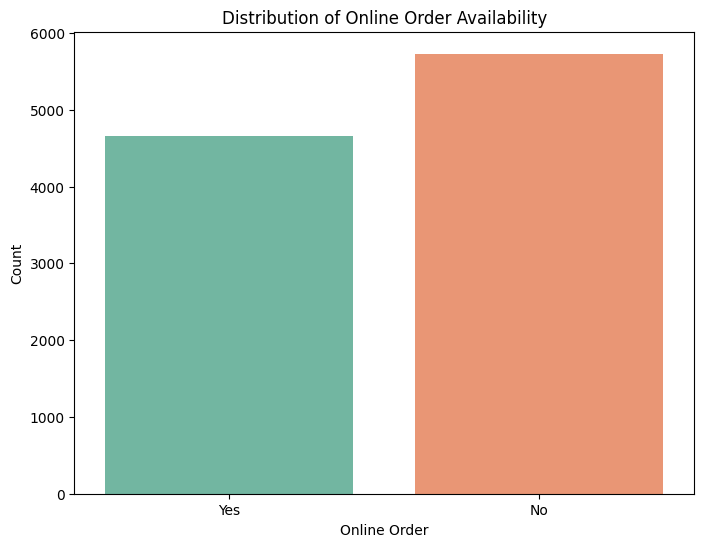

In [22]:
# Countplot - Online Order Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Online Order', palette='Set2')
plt.xlabel('Online Order')
plt.ylabel('Count')
plt.title('Distribution of Online Order Availability')
plt.show()

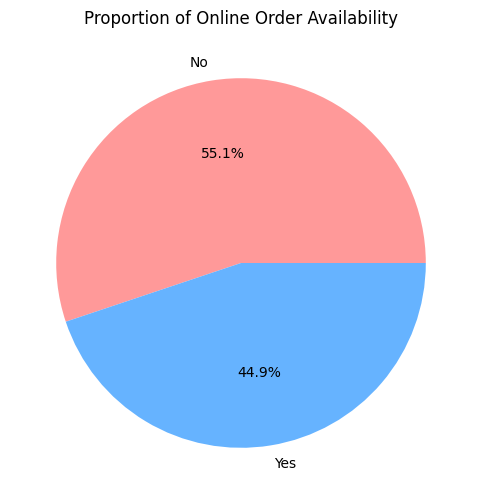

In [23]:
# Pie Chart - Online Order Proportion
online_order_counts = df['Online Order'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(online_order_counts, labels=online_order_counts.index, autopct='%1.1f%%', colors=['#FF9999', '#66B3FF', '#99FF99', '#FFFF99'])
plt.title('Proportion of Online Order Availability')
plt.show()

<h1><center style="color:#159364; font-family:cursive;">Insights🍕🍗🍔</center></h1>

<br><div  class="alert alert-success" style="background-color:  #2193b0
; border-color: #694b98; font-size: 23pt;font-family: Serif; color: white"> 
        <b> <center> Restaurant Categories </center> </b>
    <a name="Overview"></a>
</div><br>


| Category    | Count |
|-------------|-------|
| American    | 3,791 |
| Italian     | 1,439 |
| Pizza       | 984   |
| Bar         | 837   |
| French      | 647   |
| Steakhouse  | 533   |
| Mexican     | 431   |
| Seafood     | 427   |
| Asian       | 403   |
| Sushi       | 398   |


<br><div  class="alert alert-success" style="background-color:  #2193b0
; border-color: #694b98; font-size: 23pt;font-family: Serif; color: white"> 
        <b> <center> Online Ordering Availability </center> </b>
    <a name="Overview"></a>
</div><br>
Restaurant Categories

| Online Order | Count |
|--------------|-------|
| Yes          | 4,660 |
| No           | 5,729 |


<br><div  class="alert alert-success" style="background-color:  #2193b0
; border-color: #694b98; font-size: 23pt;font-family: Serif; color: white"> 
        <b> <center> Top 10 Popular Food Items </center> </b>
    <a name="Overview"></a>
</div><br>

| Popular Food    | Count |
|-----------------|-------|
| No              | 7,703 |
| Tuna            | 129   |
| Ribeye          | 126   |
| Steak           | 83    |
| Salad           | 78    |
| Lobster Bisque  | 68    |
| Carbonara       | 65    |
| Fries           | 62    |
| Dumplings       | 57    |


<br><div  class="alert alert-success" style="background-color:  #2193b0
; border-color: #694b98; font-size: 23pt;font-family: Serif; color: white"> 
        <b> <center> Top-rated Restaurants </center> </b>
    <a name="Overview"></a>
</div><br>

| Rank | Title                       | Number of Reviews |
|------|-----------------------------|------------------|
| 1    | Smith's Bar and Restaurant  | 999              |
| 2    | PRINT.                      | 992              |
| 3    | Dinosaur Bar-B-Que          | 991              |
| 4    | Via Della Pace              | 984              |
| 5    | Bar SixtyFive               | 984              |


# **Conclusion**

In this notebook, we analyzed the Trip Advisor New York City Restaurants dataset, which provided valuable insights into the restaurant landscape in New York City. Let's summarize the key findings and insights from our analysis:
 
* **Restaurant Categories:** The dataset covered a diverse range of restaurant categories, including American, Italian, Pizza, and Bar, among others. This indicates the wide variety of culinary options available in New York City.
 
* **Online Ordering:** The dataset revealed that a significant number of restaurants (around 77%) do not offer online ordering. However, there is still a notable portion of restaurants that provide online order services.
 
* **Popular Food Items:** Among the top 10 popular food items mentioned in the dataset, 'No' dominated the list, suggesting that it could be a placeholder or an indication of no specific popular food item mentioned. Other popular food items included Tuna, Ribeye, Steak, Salad, Lobster Bisque, Carbonara, Fries, and Dumplings. These insights can be valuable for understanding the preferences and trends in the New York City restaurant scene.
 
* **Review Comments:** The 'Review Comment' column contained subjective comments from customers about their dining experiences. These comments provide valuable feedback and opinions that can be used for sentiment analysis or to understand the factors influencing customer satisfaction.
 
* **Top-rated Restaurants:** We identified some of the top-rated restaurants based on the 'Number of review' column. Smith's Bar and Restaurant, PRINT., Dinosaur Bar-B-Que, Via Della Pace, and Bar SixtyFive were among the highly rated establishments in terms of the number of reviews they received.
 
In conclusion, this notebook provided a glimpse into the New York City restaurant scene using the Trip Advisor dataset. The analysis highlighted the diversity of restaurant categories, online ordering availability, popular food items, and top-rated restaurants. These insights can be useful for restaurant owners, food enthusiasts, and researchers interested in understanding the dining landscape in New York City and making informed decisions based on customer preferences and trends.